<a href="https://colab.research.google.com/github/jennkimerson/OCR_ArchivalDataOrganization_HGARC/blob/master/Mk4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mk. 4
Reads in text by binding individual characters with boxes in attempts to preserve white spaces.

Work in progress, last updated 5/23/2019

## I. Data Selection
Prompts the user to select pages they want to read in

In [21]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 9.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [0]:
import PyPDF2

# takes in a file from the user and imports the image file
from google.colab import files

uploaded = files.upload()

## II. File Conversion
Read in PDF to images

## III. Enhance Image
Reduce the background noise in images for accurate scanning

Credit to: 
https://gist.github.com/githubharald/24052afa05b6811b7f7a821fea1ef6e8#file-preprocesstextimage-py

In [0]:
import numpy as np
import cv2

In [0]:
# read
img = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)

In [0]:
# increase contrast
pxmin = np.min(img)
pxmax = np.max(img)
imgContrast = (img - pxmin) / (pxmax - pxmin) * 255

In [0]:
# increase line width
kernel = np.ones((3, 3), np.uint8)
imgMorph = cv2.erode(imgContrast, kernel, iterations = 1)

In [46]:
# write
cv2.imwrite('sample.jpg', imgMorph)

True

In [0]:
from PIL import Image

img = Image.open("sample.jpg")
rgb_img = img.convert('RGB')
rgb_img.save('sample.jpeg')

##IV. Binding boxes with Enclosed Characters
Finds all text characters in the image and returns binidng boxes with enclosed characters

In [50]:
!pip install pytesseract
!sudo apt install tesseract-ocr
#!git clone https://github.com/jennkimerson/OCR_ArchivalDataOrganization_HGARC.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [0]:
import pytesseract
from pytesseract import Output

In [0]:
#open segmented image to be processed

try:
    from PIL import Image
except ImportError:
    import Image
    
img = Image.open('sample.jpeg')

In [0]:
#draw boxes around each of the found characters

import cv2
import numpy as np

nparray = np.array(img)

h, w, _ = nparray.shape

#char with bounding boxes
boxes = pytesseract.image_to_boxes(img)

# draw the bounding boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    draw = cv2.rectangle(nparray, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2) #currently outputs wrong color scheme

#fixes color error
RGB_img = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

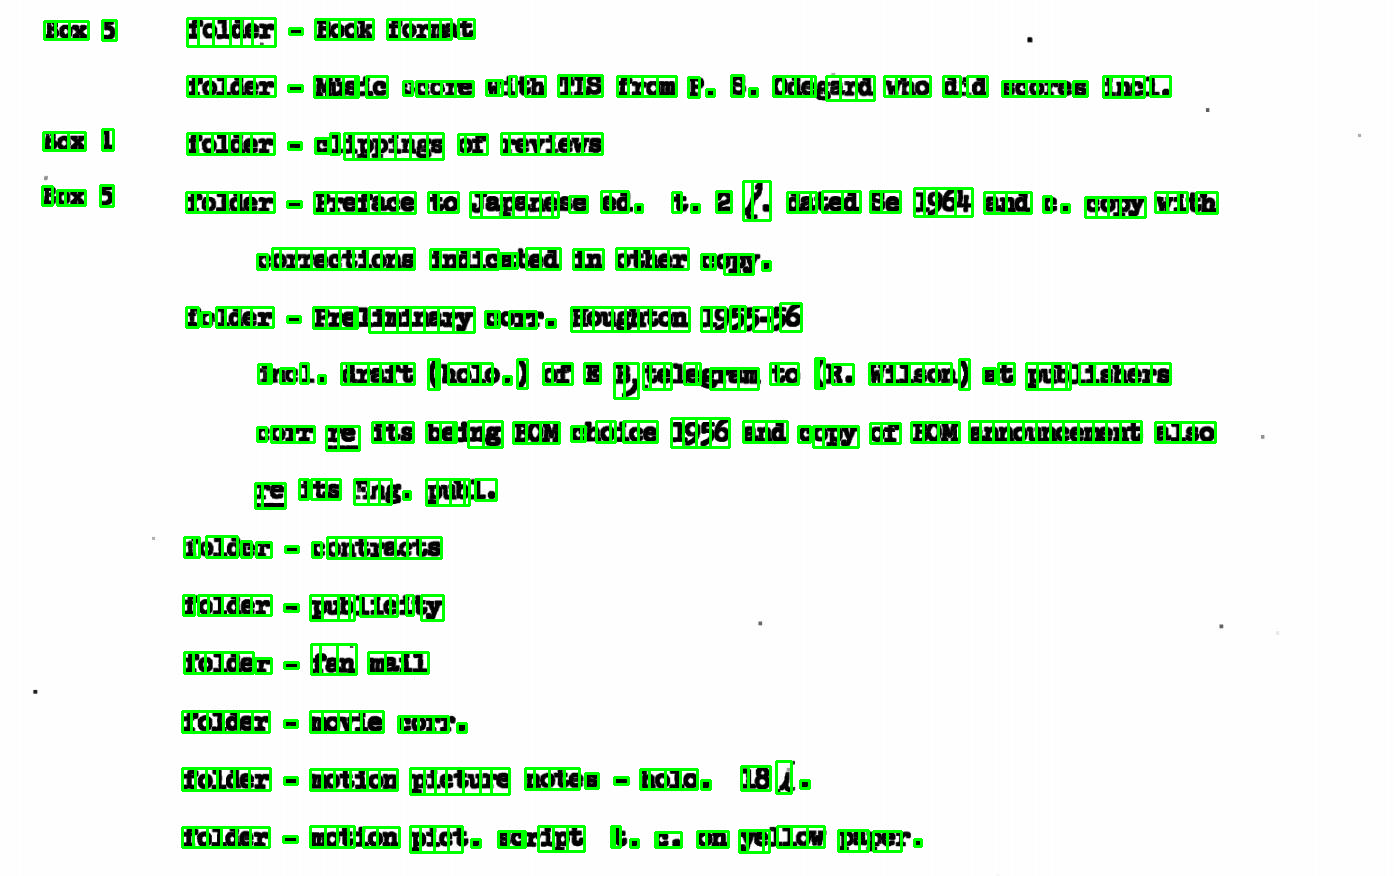

In [54]:
#show result
from google.colab.patches import cv2_imshow
#%matplotlib inline
cv2_imshow(RGB_img)

##V. Find Minimum X Coordinate Value
Get coordinates of all boxes in order to find the minimum x coordniate value. This is where we will start counting white spaces.

In [55]:
#size of the segmented image in width and hieght

width, height = img.size
print (width, height)

1394 876


In [58]:
#find all characters and their coordinates in the image

from pytesseract import pytesseract as pt

coord = pt.image_to_boxes(img)
print(coord)

B 44 837 55 855 0
o 55 837 69 855 0
x 69 837 88 855 0
5 102 836 116 856 0
B 43 726 52 744 0
o 52 726 68 744 0
x 68 726 85 744 0
1 102 726 113 747 0
B 42 671 52 690 0
o 57 671 65 686 0
x 65 671 85 686 0
5 100 670 113 691 0
f 187 830 198 858 0
o 198 830 213 858 0
l 213 830 230 858 0
d 230 830 241 858 0
e 241 830 252 858 0
r 252 830 275 858 0
- 289 842 302 848 0
B 315 837 327 857 0
o 327 837 339 857 0
o 339 837 355 857 0
k 355 837 373 857 0
f 387 837 399 857 0
o 399 837 410 857 0
r 410 837 429 857 0
m 429 837 440 857 0
a 440 837 451 857 0
t 458 838 474 857 0
f 187 780 196 800 0
o 196 780 210 800 0
l 210 780 225 800 0
d 225 780 240 800 0
e 240 780 254 800 0
r 254 780 275 800 0
- 288 785 302 791 0
M 314 779 327 800 0
i 327 779 343 800 0
s 343 779 355 800 0
i 355 779 358 800 0
c 366 779 387 800 0
s 403 781 412 795 0
c 416 780 426 795 0
o 426 780 441 795 0
r 441 780 455 795 0
e 455 780 473 795 0
w 486 781 498 796 0
i 498 781 502 796 0
t 509 780 516 800 0
h 525 780 545 800 0
T 558 780 569 801 

In [59]:
#break string

coordList = sentences = coord.splitlines()
#coordList = coord[0:len(coord)-1].split("\n")
print(coordList)

coordList2 = []
for i in range(0, len(coordList)):
  new = coordList[i].split(" ")
  coordList2.append(new)
print(coordList2)

['B 44 837 55 855 0', 'o 55 837 69 855 0', 'x 69 837 88 855 0', '5 102 836 116 856 0', 'B 43 726 52 744 0', 'o 52 726 68 744 0', 'x 68 726 85 744 0', '1 102 726 113 747 0', 'B 42 671 52 690 0', 'o 57 671 65 686 0', 'x 65 671 85 686 0', '5 100 670 113 691 0', 'f 187 830 198 858 0', 'o 198 830 213 858 0', 'l 213 830 230 858 0', 'd 230 830 241 858 0', 'e 241 830 252 858 0', 'r 252 830 275 858 0', '- 289 842 302 848 0', 'B 315 837 327 857 0', 'o 327 837 339 857 0', 'o 339 837 355 857 0', 'k 355 837 373 857 0', 'f 387 837 399 857 0', 'o 399 837 410 857 0', 'r 410 837 429 857 0', 'm 429 837 440 857 0', 'a 440 837 451 857 0', 't 458 838 474 857 0', 'f 187 780 196 800 0', 'o 196 780 210 800 0', 'l 210 780 225 800 0', 'd 225 780 240 800 0', 'e 240 780 254 800 0', 'r 254 780 275 800 0', '- 288 785 302 791 0', 'M 314 779 327 800 0', 'i 327 779 343 800 0', 's 343 779 355 800 0', 'i 355 779 358 800 0', 'c 366 779 387 800 0', 's 403 781 412 795 0', 'c 416 780 426 795 0', 'o 426 780 441 795 0', 'r 44

In [60]:
#consolidate x coordinates into an array to find min x coordinate

xcoords = []

for i in range(len(coordList2)):
  current = int(coordList2[i][1])
  #round current value to nearest multiple of 5 to reduce variability
  rounded = 5 * round(current/5)
  xcoords.append(rounded)
print(xcoords)


#find min x coordinate to find the first occuring letter
print ("min x coordinate vlaue : ", min(xcoords))

[45, 55, 70, 100, 45, 50, 70, 100, 40, 55, 65, 100, 185, 200, 215, 230, 240, 250, 290, 315, 325, 340, 355, 385, 400, 410, 430, 440, 460, 185, 195, 210, 225, 240, 255, 290, 315, 325, 345, 355, 365, 405, 415, 425, 440, 455, 485, 500, 510, 525, 560, 570, 585, 615, 630, 640, 655, 690, 705, 730, 750, 775, 785, 795, 810, 825, 840, 855, 885, 895, 910, 945, 965, 1000, 1010, 1025, 1035, 1050, 1075, 1105, 1110, 1120, 1135, 1150, 185, 195, 210, 230, 240, 250, 290, 315, 330, 345, 355, 370, 380, 395, 410, 425, 460, 465, 500, 510, 525, 540, 555, 570, 580, 185, 195, 205, 225, 240, 250, 285, 315, 325, 335, 355, 370, 380, 395, 430, 440, 470, 480, 500, 515, 525, 540, 550, 570, 600, 610, 635, 670, 690, 715, 745, 750, 785, 795, 810, 820, 840, 870, 880, 915, 925, 935, 955, 985, 995, 1005, 1045, 1060, 1085, 1095, 1110, 1120, 1155, 1165, 1180, 1195, 255, 270, 280, 295, 310, 325, 340, 355, 365, 380, 395, 430, 440, 455, 470, 480, 500, 510, 525, 540, 575, 585, 615, 625, 640, 655, 670, 700, 710, 725, 740, 760, 1

In [64]:
xcoords.sort()

print('Sorted list:', xcoords)

Sorted list: [40, 45, 45, 50, 55, 55, 65, 70, 70, 100, 100, 100, 180, 180, 180, 185, 185, 185, 185, 185, 185, 185, 185, 190, 195, 195, 195, 195, 195, 195, 195, 200, 200, 200, 205, 205, 205, 205, 205, 205, 210, 210, 210, 215, 215, 215, 220, 220, 220, 220, 225, 225, 225, 225, 230, 230, 235, 235, 235, 235, 240, 240, 240, 240, 240, 240, 240, 250, 250, 250, 250, 250, 250, 250, 250, 255, 255, 255, 255, 255, 255, 260, 260, 270, 270, 270, 280, 280, 280, 285, 285, 285, 285, 285, 285, 285, 285, 290, 290, 290, 295, 295, 300, 300, 310, 310, 310, 310, 310, 310, 310, 310, 315, 315, 315, 315, 315, 320, 320, 320, 320, 320, 325, 325, 325, 325, 325, 325, 325, 325, 325, 330, 335, 335, 335, 335, 335, 340, 340, 340, 340, 340, 340, 340, 345, 345, 350, 350, 350, 350, 350, 350, 355, 355, 355, 355, 355, 355, 355, 360, 360, 365, 365, 365, 365, 365, 370, 370, 370, 370, 370, 370, 370, 375, 375, 380, 380, 380, 380, 380, 380, 380, 385, 385, 385, 385, 390, 395, 395, 395, 395, 395, 395, 395, 400, 400, 400, 400, 405, 

## VI. Quality Check
Match the transposed vertical text file with horizontally scanned result to quality check

## VII. Structure Selection & Data Categorization
Prompts the user for structure (formatting and organization of data)

## VIII. Reassemble Data
Create a CSV or Excel file with the processed data

In [0]:
! pip install XlsxWriter
! pip install pandas
import pandas as pd

    100% |████████████████████████████████| 143kB 6.6MB/s 


In [0]:
df= pd.DataFrame(split)
#df = df.transpose()

print(df)

In [0]:
df.to_excel("output.xlsx")